In [24]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [29]:
nltk.download('all')
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    text = text.lower()

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs
    #text = re.sub(r"http", "",text)

    html=re.compile(r'<.*?>')

    text = html.sub(r'',text) #Removing html tags

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations

    text = [word.lower() for word in text.split() if word.lower() not in sw]

    text = [lemmatizer.lemmatize(word) for word in text]

    text = " ".join(text) #removing stopwords and lemmatizing

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis

    return text

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [30]:
def preprocess(df):
  df['text'] = df['text'].apply(lambda x: clean_text(x))
  df = df.fillna('NaN', axis=1)
  df['text'] = 'KEYWORD= ' + df.keyword + '; LOCATION= ' + df.location + '; TEXT= ' + df.text
  df.drop(["id", "keyword", "location"], inplace=True, axis=1)
  return df

In [31]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [32]:
df_train.isna().sum()

text      0
target    0
dtype: int64

In [33]:
df_train.shape

(7613, 2)

<Axes: >

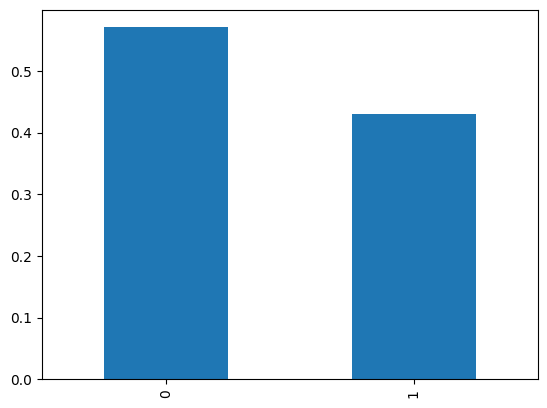

In [34]:
df_train['target'].value_counts(normalize=True).plot.bar()

In [44]:
TRAIN_SPLIT = 0.9
VAL_SPLIT = 0.1

from sklearn.model_selection import train_test_split

X = df_train["text"]
y = df_train["target"]
y=y.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df_test["text"]

In [45]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(6851, 21262)

In [46]:
y_train

4620    0
2858    1
3098    0
3751    0
5285    1
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 6851, dtype: int64

In [52]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_cv, y_train)


# transform X_val using CV
X_val_cv = cv.transform(X_val)


# generate predictions
predictions = lr.predict(X_val_cv)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [53]:
df = pd.DataFrame(confusion_matrix(y_val,predictions), index=[0,1], columns=[0,1])

df

,0,1
0,359,67
1,105,231


In [54]:
# Preparing submission

# transform X_test using CV
X_test_cv = cv.transform(X_test)


# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array([0, 0, 1, ..., 1, 1, 0])

In [55]:
predicted_df = df_test.copy()
predicted_df['target'] = predictions

In [56]:
predicted_df

,text,target
0,KEYWORD= NaN; LOCATION= NaN; TEXT= happened te...,0
1,KEYWORD= NaN; LOCATION= NaN; TEXT= heard earth...,0
2,KEYWORD= NaN; LOCATION= NaN; TEXT= forest fire...,1
3,KEYWORD= NaN; LOCATION= NaN; TEXT= apocalypse ...,1
4,KEYWORD= NaN; LOCATION= NaN; TEXT= typhoon sou...,1
...,...,...
3258,KEYWORD= NaN; LOCATION= NaN; TEXT= earthquake ...,0
3259,KEYWORD= NaN; LOCATION= NaN; TEXT= storm ri wo...,1
3260,KEYWORD= NaN; LOCATION= NaN; TEXT= green line ...,1
3261,KEYWORD= NaN; LOCATION= NaN; TEXT= meg issue h...,1


In [58]:
submission_df = pd.read_csv(f'/content/sample_submission.csv')
submission = pd.DataFrame({"id": submission_df['id'],
            "target":predictions})
submission.to_csv('/content/submission.csv', index=False)